# A quick notebook I made for my friend who ran a 24 hour ultra race.

In [46]:
import pandas as pd
import numpy as np
%matplotlib inline
import statsmodels as sm
import seaborn as sns

In [ ]:
# this dataset presnted a number of challenges, notably with the date time format. The raw data had an inconsistent
# time scheme in the clock time (missing hour fields) which needed to be stripped manually. 

In [88]:
data = pd.read_csv('./Phil_data.csv', sep = '    ', usecols=[1,0], index_col=1, parse_dates=True, infer_datetime_format=True)

/Users/sarah-bethamos/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [89]:
data.head()

,Lap
Clock,
2019-09-22 00:02:04.660,1
2019-09-22 00:04:24.540,2
2019-09-22 00:06:46.170,3
2019-09-22 00:09:05.640,4
2019-09-22 00:11:27.240,5


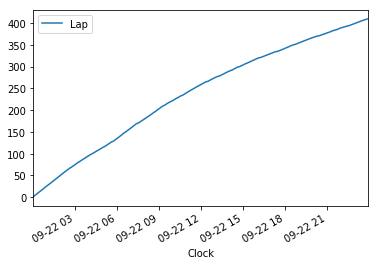

In [92]:
# time to reach each lap - 
data.plot()

In [ ]:
# now to look at the splits

In [100]:
splits = pd.read_csv('./Phil_data.csv', sep = '    ', usecols=[0,2], index_col=0)

/Users/sarah-bethamos/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [101]:
splits.head()

,Lap time
Lap,
1,02:04.66
2,02:19.88
3,02:21.63
4,02:19.46
5,02:21.60


In [107]:
# a list comprehension to turn the timestamp into a format that is more amenable to statistics (seconds)
splits['new_split'] = [np.float(a) * 60 + np.float(b) for a,b in splits['Lap time'].str.split(':')]

In [108]:
splits.head()

,Lap time,new_split
Lap,,
1,02:04.66,124.66
2,02:19.88,139.88
3,02:21.63,141.63
4,02:19.46,139.46
5,02:21.60,141.60


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b662d90>]], dtype=object)

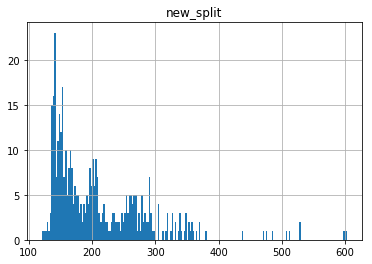

In [115]:
# a histogram of split times
splits.hist(column='new_split', bins=200, )

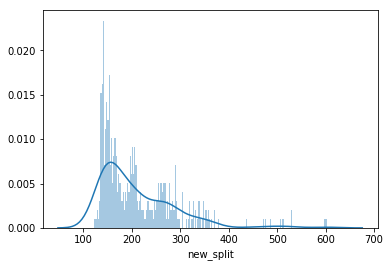

In [123]:
# a distribution plot
sns.distplot(splits['new_split'], bins=200)

In [124]:
# some summary statistics for splits:
splits['new_split'].describe()

count    410.000000
mean     210.362366
std       78.383890
min      121.210000
25%      151.672500
50%      188.675000
75%      255.482500
max      602.190000
Name: new_split, dtype: float64